# Majeure Science des données 2023-2024

## TP Information
- **University Program (UP):** Apprentissage statistique
- **Course Title:** Analyse de données / réduction de dimension
- **Course Type:** Cours
- **Year:** 2023-2024

### Course Description
This course, "Analyse de données / réduction de dimension," is part of the Majeure Science des données program for the academic year 2023-2024. It is offered under the University Program (UP) "Apprentissage statistique."



---
Done by :
*ELMAHFOUD Radouane* -
*EL HAFI Farah* -
*LMOURID Safae* -
*LMOURID Hanae*.


In [51]:
import numpy as np
import matplotlib.pyplot as plt

3.1 Statistiques nécessaires à l’ACP
* Ecrire la matrice de données X
* Comme rien n’est précisé quel est le poids statistique de chaque point i et donner la matrice
diagonale D des poids des individus
* Calculer la moyenne de chacune des var. X et Y (si possible de façon matricielle)
* Centrer les données pour obtenir la matrice de données centrées Z de dimension (6,2)
* Calculer la matrice de variance-covariances, que valent S2(X) et S2(Y) et cov(X,Y) 

Étape 1 : Ecrire la matrice de données X

In [52]:
#Ecrire la matrice de données X
X=np.array([[0,1,0,1,1,0],[0,1,1,0,1,0]]).T
X

array([[0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

Étape 2 : Matrice diagonale des poids des individus D

Vous mentionnez que rien n'est précisé concernant les poids des individus. Par conséquent, supposons que les poids des individus sont tous égaux à 1. Dans ce cas, la matrice diagonale D des poids des individus est une matrice identité de dimension (6, 6) car il y a 6 individus :

In [53]:
#on a travaillé avec l'identité mais aprés on va multiplier par 1/n=1/6
D = np.eye(6)

Étape 3 : Calcul des moyennes de X et Y

Pour calculer les moyennes de chaque variable $\mathrm{X}$ et $\mathrm{Y}$ de manière matricielle, vous pouvez utiliser les poids des individus $\mathrm{D}$ que nous venons de définir. Les moyennes sont calculées comme suit :

Moyenne $X$ (moyenne des colonnes) :
$$
\bar{X}=\frac{1}{n} X^T D \mathbf{1}
$$

Moyenne $Y$ (moyenne des colonnes) :
$$
\bar{Y}=\frac{1}{n} Y^T D \mathbf{1}
$$


Calculons les moyennes en utilisant les valeurs que vous avez fournies:

In [54]:
mean_X = (1/6) * X[:, 0].T @ D @ np.ones((6, 1))
mean_Y = (1/6) * X[:, 1].T @ D @ np.ones((6, 1))
print("mean_X = ",mean_X)
print("mean_Y = ",mean_Y)

mean_X =  [0.5]
mean_Y =  [0.5]


Étape 4 : Centrage des données pour obtenir la matrice de données centrées Z

In [55]:
Z=X-np.mean(X, axis=0)

In [56]:
Z

array([[-0.5, -0.5],
       [ 0.5,  0.5],
       [-0.5,  0.5],
       [ 0.5, -0.5],
       [ 0.5,  0.5],
       [-0.5, -0.5]])

In [57]:
print("mean(Z) =",Z.mean())

mean(Z) = 0.0


Étape 5: Calcul de la matrice de variance-covariance et des variances et covariances

La matrice de variance-covariance A est calculée comme suit :
$$
A=\frac{1}{n} Z^T D Z
$$

Où :
- A est la matrice de variance-covariance,
- Z est la matrice de données centrées ,
- D est la matrice diagonale des poids des individus (une matrice identité),
- n est le nombre d'individus (dans ce cas, 6).

Les éléments diagonaux de la matrice A représentent les variances des variables, et les éléments non diagonaux représentent les covariances entre les variables. 

Calculons la matrice de variance-covariance A ainsi que les variances et la covariance :

In [58]:
D

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [59]:
Z

array([[-0.5, -0.5],
       [ 0.5,  0.5],
       [-0.5,  0.5],
       [ 0.5, -0.5],
       [ 0.5,  0.5],
       [-0.5, -0.5]])

In [60]:
X

array([[0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

In [61]:
# Matrice de variance-covariance S
A = (1/6) * Z.T @ D @ Z

# Variances et covariance
variance_X = A[0, 0]
variance_Y = A[1, 1]
covariance_XY = A[0, 1]

# Afficher les résultats
print("Matrice de variance-covariance A :")
print(A)
print("Variance de X (S^2(X)) :", variance_X)
print("Variance de Y (S^2(Y)) :", variance_Y)
print("Covariance entre X et Y (cov(X, Y)) :", covariance_XY)

Matrice de variance-covariance A :
[[0.25       0.08333333]
 [0.08333333 0.25      ]]
Variance de X (S^2(X)) : 0.24999999999999997
Variance de Y (S^2(Y)) : 0.24999999999999997
Covariance entre X et Y (cov(X, Y)) : 0.08333333333333333


3.2 Calculer les valeurs propres $\lambda_1$ et $\lambda_2$. Vérifier que la somme des valeurs propres de la matrice de covariance $A$ est la trace de la matrice $A$ et sachant que le déterminant de la matrice $A$ est égal au produit des valeurs propres $\lambda_1 \times \lambda_2$.

\begin{aligned}
& \lambda_1=\frac{1}{2}\left(s^2(X)+s^2(Y)+\sqrt{\left(s^2(X)-s^2(Y)\right)^2+4(\operatorname{Cov}[X, Y])^2}\right) \\
& \lambda_2=\frac{1}{2}\left(s^2(X)+s^2(Y)-\sqrt{\left(s^2(X)-s^2(Y)\right)^2+4(\operatorname{Cov}[X, Y])^2}\right)
\end{aligned}

In [62]:
# Calculate s^2(X), s^2(Y), and Cov(X, Y)
s2_X = np.mean(Z[:, 0] ** 2)
s2_Y = np.mean(Z[:, 1] ** 2)
Cov_XY = np.mean(Z[:, 0] * Z[:, 1])

# Calculate lambda_1 and lambda_2
discriminant = np.sqrt((variance_X - variance_Y) ** 2 + 4 * (covariance_XY ** 2))
lambda_1 = 0.5 * (variance_X + variance_Y + discriminant)
lambda_2 = 0.5 * (variance_X + variance_Y - discriminant)
eigenvalues=np.array([lambda_1,lambda_2])
# Print the eigenvalues
print(f"lambda_1: {lambda_1}")
print(f"lambda_2: {lambda_2}")

lambda_1: 0.3333333333333333
lambda_2: 0.16666666666666663


On remarque bien que $\lambda_1$ > $\lambda_2$

Le polynôme caractéristiques (pour $\mathrm{n}=2$ ) a 2 racines donc 2 valeurs propres distinctes ( $\lambda 1$ et $\lambda 2)$ avec :
- la somme des valeurs propres est la trace de la matrice, somme des éléments de la première diagonale $\quad \lambda_1+\lambda_2=s^2(X)+s^2(Y)=trace(A) \geq 0$

In [63]:
# Somme des valeurs propres
sum_eigenvalues = np.sum(eigenvalues)
# Trace de la matrice A (c'est la somme des éléments diagonaux de S)
trace_A = np.trace(A)
print("Somme des valeurs propres :", sum_eigenvalues)
print("Trace de la matrice A :", trace_A)

Somme des valeurs propres : 0.49999999999999994
Trace de la matrice A : 0.49999999999999994


Donc on a bien l'égalité.

- le produit de ces valeurs propres est le déterminant de la matrice
$$
\lambda_1 \lambda_2=s^2(X) s^2(Y)-(\operatorname{Cov}(X, Y))^2=det(A) \geq 0
$$

In [64]:
# Calcul du déterminant de la matrice A
determinant_A = np.linalg.det(A)
# Produit des valeurs propres
product_eigenvalues = eigenvalues[0] * eigenvalues[1]
print("Déterminant de la matrice A :", determinant_A)
print("Produit des valeurs propres (lambda_1 * lambda_2) :", product_eigenvalues)

Déterminant de la matrice A : 0.05555555555555554
Produit des valeurs propres (lambda_1 * lambda_2) : 0.05555555555555554


3.3 A partir des éléments du TD, donner l'expression et la valeur des 2 vecteurs propres $u_1$ et $u_2$ correspondant aux 2 valeurs propres $\lambda_1$ et $\lambda_2$.

En utilisant les expressions :

Pour $u_1$ (première valeur propre) :
$$
u_1=\frac{1}{\sqrt{\left(s^2(Y)-\lambda_1\right)^2+(\operatorname{Cov}(X, Y))^2}}\left(\begin{array}{c}
s^2(Y)-\lambda_1 \\
-\operatorname{Cov}(X, Y)
\end{array}\right)
$$

Pour  $u_2$ (deuxième valeur propre):
$$
u_2=\frac{1}{\sqrt{\left(s^2(Y)-\lambda_2\right)^2+(\operatorname{Cov}(X, Y))^2}}\left(\begin{array}{c}
s^2(Y)-\lambda_2 \\
-\operatorname{Cov}(X, Y)
\end{array}\right)
$$

Voici comment on peut implémenter ces calculs en Python :

In [65]:
# Valeurs propres
lambda_1 = eigenvalues[0]
lambda_2 = eigenvalues[1]

# Calcul des vecteurs propres u1 et u2
u1 = (1 / np.sqrt((variance_Y - lambda_1)**2 + covariance_XY**2)) * np.array([variance_Y - lambda_1, -covariance_XY])
u2 = (1 / np.sqrt((variance_Y - lambda_2)**2 + covariance_XY**2)) * np.array([variance_Y - lambda_2, -covariance_XY])

# Afficher les vecteurs propres
print("Vecteur propre u1 :", u1)
print("Vecteur propre u2 :", u2)

Vecteur propre u1 : [-0.70710678 -0.70710678]
Vecteur propre u2 : [ 0.70710678 -0.70710678]


3.4 Vérifier que $I_s(u)={ }^t u A u=\lambda{ }^t u u=\lambda\|u\|^2=\lambda$ pour un axe principal de droite $\mathbf{D}$ de vecteur propre u pour l'inertie statistique expliquée par les 2 axes principaux.

In [66]:
# Calcul de l'inertie statistique pour u1
Is_u1 = u1.T @ A @ u1
print("Is_u1 =",Is_u1)

# Comparaison avec la valeur propre correspondante (lambda_1)
if np.isclose(Is_u1, eigenvalues[0]):
    print("Inertie statistique pour u1 vérifiée :", Is_u1)
else:
    print("Inertie statistique pour u1 non vérifiée :", Is_u1)

# Calcul de l'inertie statistique pour u2
Is_u2 = u2.T @ A @ u2
print("Is_u1 =",Is_u2)

# Comparaison avec la valeur propre correspondante (lambda_2)
if np.isclose(Is_u2, eigenvalues[1]):
    print("Inertie statistique pour u2 vérifiée :", Is_u2)
else:
    print("Inertie statistique pour u2 non vérifiée :", Is_u2)


Is_u1 = 0.33333333333333326
Inertie statistique pour u1 vérifiée : 0.33333333333333326
Is_u1 = 0.16666666666666663
Inertie statistique pour u2 vérifiée : 0.16666666666666663


3.5 Vérifier que la somme de l'inertie totale du nuage est à la somme de l'inertie statistique portée par chacun des 2 axes principaux (trace de la matrice de covariance) : $I_T=I_s\left(u_1\right)+I_s\left(u_2\right)$

In [67]:
# Calcul de l'inertie totale I_T
IT = (1/6) * np.sum(Z**2)
print("IT =",IT)

# Calcul de l'inertie statistique Is(u) pour les deux axes principaux
IS_u1 = (1/6) * np.sum((Z @ u1)**2)
IS_u2 = (1/6) * np.sum((Z @ u2)**2)
print("IS_u1 =",IS_u1)
print("IS_u1 =",IS_u1)

# Vérification de l'énoncé 3.4
lambda_1_verification = IS_u1
lambda_2_verification = IS_u2

# Vérification de l'énoncé 3.5
IT_verification = IS_u1 + IS_u2

# Affichage des résultats
print(f"lambda_1 vérification: {lambda_1_verification}")
print(f"lambda_2 vérification: {lambda_2_verification}")
print(f"I_T vérification: {IT_verification}")

IT = 0.5
IS_u1 = 0.33333333333333326
IS_u1 = 0.33333333333333326
lambda_1 vérification: 0.33333333333333326
lambda_2 vérification: 0.16666666666666663
I_T vérification: 0.4999999999999999


In [68]:
# Somme des valeurs propres de la matrice de covariance (trace de A)
trace_A = np.trace(A)

# Somme de l'inertie statistique portée par les deux axes principaux
Is_sum = eigenvalues[0] + eigenvalues[1]
print("I_T=",Is_sum)

# Comparaison entre l'inertie totale et la somme des inertie statistiques
if np.isclose(trace_A, Is_sum):
    print("Vérification réussie : I_T = Is(u1) + Is(u2)")
    I_T = IS_u1 + IS_u2
else:
    print("Vérification échouée : I_T ≠ Is(u1) + Is(u2)")

I_T= 0.49999999999999994
Vérification réussie : I_T = Is(u1) + Is(u2)


3.6 Faire le graphique des 2 axes principaux D1 et D2.

In [69]:
u1,u2

(array([-0.70710678, -0.70710678]), array([ 0.70710678, -0.70710678]))

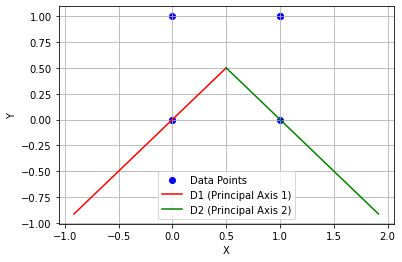

In [70]:
# Calculate coordinates for D1 and D2
mean_X=np.mean(X, axis=0)
D1 = mean_X + 2 * u1
D2 = mean_X + 2 * u2

# Create a scatter plot of your data
plt.scatter(X[:, 0], X[:, 1], label='Data Points', c='blue')

# Plot the two principal axes
plt.plot([mean_X[0], D1[0]], [mean_X[1], D1[1]], label='D1 (Principal Axis 1)', c='red')
plt.plot([mean_X[0], D2[0]], [mean_X[1], D2[1]], label='D2 (Principal Axis 2)', c='green')

# Set axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()


* Autre Méthode :

(D1): y = mx + c et u1 vecteur directeur donc m=u1[1]/u1[0]

aussi mean(X)=np.mean(X, axis=0) £ à (D1) donc c=mean(X)[1]-mean(X)[0]*(u1[1]/u[0])

In [71]:
'''# Create a scatter plot of your data
plt.scatter(X[:, 0], X[:, 1], label='Data Points', c='blue')
x=np.linspace(-1,2,5)
y1=(u1[1]/u1[0])*x+mean_Y[0]-mean_X[0]*(u1[1]/u1[0])
y2=(u2[1]/u2[0])*x+mean_Y[0]-mean_X[0]*(u2[1]/u2[0])
# Plot the two principal axes
plt.plot(x, y1, label='D1 (Principal Axis 1)', c='red')
plt.plot(x, y2, label='D2 (Principal Axis 2)', c='green')
# Définissez le nombre de divisions souhaité sur l'axe Y (par exemple, 10 divisions)
num_divisions = 10
plt.yticks(num_divisions)
# Set axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Add legend
plt.legend()

# Show the plot
plt.grid()
plt.show()'''

"# Create a scatter plot of your data\nplt.scatter(X[:, 0], X[:, 1], label='Data Points', c='blue')\nx=np.linspace(-1,2,5)\ny1=(u1[1]/u1[0])*x+mean_Y[0]-mean_X[0]*(u1[1]/u1[0])\ny2=(u2[1]/u2[0])*x+mean_Y[0]-mean_X[0]*(u2[1]/u2[0])\n# Plot the two principal axes\nplt.plot(x, y1, label='D1 (Principal Axis 1)', c='red')\nplt.plot(x, y2, label='D2 (Principal Axis 2)', c='green')\n# Définissez le nombre de divisions souhaité sur l'axe Y (par exemple, 10 divisions)\nnum_divisions = 10\nplt.yticks(num_divisions)\n# Set axis labels\nplt.xlabel('X')\nplt.ylabel('Y')\n\n# Add legend\nplt.legend()\n\n# Show the plot\nplt.grid()\nplt.show()"

In [72]:
u1,u2

(array([-0.70710678, -0.70710678]), array([ 0.70710678, -0.70710678]))

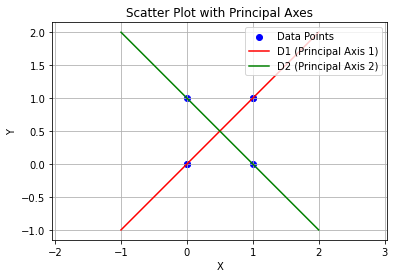

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of your data
plt.scatter(X[:, 0], X[:, 1], label='Data Points', c='blue')

# Define the range for x values
x = np.linspace(-1, 2, 5)

# Calculate the y values for the two principal axes
y1 = (u1[1] / u1[0]) * (x-mean_X[0]) + mean_Y[0]
y2 = (u2[1] / u2[0]) *  (x-mean_X[0])+ mean_Y[0]

# Plot the two principal axes
plt.plot(x, y1, label='D1 (Principal Axis 1)', c='red')
plt.plot(x, y2, label='D2 (Principal Axis 2)', c='green')

# Set axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Add a title
plt.title('Scatter Plot with Principal Axes')

# Add a legend with a custom location
plt.legend(loc='upper right')

# Set the aspect ratio to be equal to ensure the same scale on both axes
plt.axis('equal')

# Add grid lines
plt.grid()

# Show the plot
plt.show()


3.7 Calculer le taux d'inertie expliqué par chaque composante

$\frac{\lambda_{\mathrm{i}}}{\lambda_1+\lambda_2+\ldots \lambda_{\mathrm{p}}}$
mesure la part d'inertie expliquée par l'axe i.

In [74]:
# Taux d'inertie expliqué par chaque composante
explained_inertia_component1 = eigenvalues[0] / np.sum(eigenvalues)
explained_inertia_component2 = eigenvalues[1] / np.sum(eigenvalues)

# Afficher les taux d'inertie expliqués
print("Taux d'inertie expliqué par la composante 1 (D1) :", explained_inertia_component1)
print("Taux d'inertie expliqué par la composante 2 (D2) :", explained_inertia_component2)

Taux d'inertie expliqué par la composante 1 (D1) : 0.6666666666666667
Taux d'inertie expliqué par la composante 2 (D2) : 0.3333333333333333


4. Coordonnées factorielles et composantes principales

Calculer les coordonnées factorielles de chacun des 6 individus, soit les 6 vecteurs $\overrightarrow{G M_t}$, dans la base propre orthonormée $\{\mathrm{u} 1, \mathrm{u} 2\}$ à partir de la matrice des coordonnées $V$ des vecteurs propres. Pour chaque point $i$ le projeté de $G m_i$ est défini par le produit scalaire entre $\overrightarrow{G M_l}$, et $u$, soit les coordonnées factorielles du nuage de points dans $\mathbb{R}^2$ muni de la base $\{\mathrm{u} 1, \mathrm{u} 2\}$ :
$$
\left.\left(\left\langle\overrightarrow{G M_l} \mid u_1\right\rangle\left\langle\overrightarrow{G M_l} \mid u_2\right\rangle\right)={ }^t\left(\begin{array}{l}
\left\langle\overrightarrow{G M_l} \mid u_1\right\rangle \\
\left\langle\overrightarrow{G M_l} \mid u_2\right\rangle
\end{array}\right)={ }^t\left({ }^t V\right)\left(\begin{array}{l}
x_{i 0} \\
y_{i 0}
\end{array}\right)\right)=\left(\begin{array}{ll}
x_{i 0} & y_{i 0}
\end{array}\right) V \text { pour tout } i \in\{1, \ldots n\}
$$

Projection d'un individu (un point de $\mathbb{R}^p$ ) sur un axe.

La projection orthogonale d'un point $\mathbf{z}_i \in \mathbb{R}^p$ sur un axe $\Delta_\alpha$ de vecteur directeur $\mathbf{v}_\alpha$ $\left(\mathbf{v}_\alpha^T \mathbf{v}_\alpha=1\right)$ a pour coordonnée :
$$
f_{i \alpha}=<\mathbf{z}_i, \mathbf{v}_\alpha>=\mathbf{z}_i^T \mathbf{v}_\alpha,
$$
et le vecteur des coordonnées de projections des $n$ individus est :
$$
\mathbf{f}^\alpha=\left(\begin{array}{c}
f_{1 \alpha} \\
\vdots \\
f_{n \alpha}
\end{array}\right)=\mathbf{Z} \mathbf{v}_\alpha=\sum_{j=1}^p v_{j \alpha} \mathbf{z}^j .
$$
- $\mathbf{f}^\alpha$ est une combinaison linéaire des colonnes de $\mathbf{Z}$.
- $\mathbf{f}^\alpha$ est centré si les colonnes de $\mathbf{Z}$ sont centrées.

In [75]:
# Matrice des coordonnées factorielles V (vecteurs propres u1 et u2)
V = np.column_stack((u1, u2))

# Calcul des coordonnées factorielles pour chaque individu
coordonnees_factorielles = Z @ V


# Affichage des coordonnées factorielles
print("Coordonnées factorielles des individus :")
for i, coord in enumerate(coordonnees_factorielles):
    print(f"Individu {i+1}: ({coord[0]}, {coord[1]})")

Coordonnées factorielles des individus :
Individu 1: (0.7071067811865475, -5.551115123125783e-17)
Individu 2: (-0.7071067811865475, 5.551115123125783e-17)
Individu 3: (5.551115123125783e-17, -0.7071067811865475)
Individu 4: (-5.551115123125783e-17, 0.7071067811865475)
Individu 5: (-0.7071067811865475, 5.551115123125783e-17)
Individu 6: (0.7071067811865475, -5.551115123125783e-17)


In [76]:
coordonnees_factorielles

array([[ 7.07106781e-01, -5.55111512e-17],
       [-7.07106781e-01,  5.55111512e-17],
       [ 5.55111512e-17, -7.07106781e-01],
       [-5.55111512e-17,  7.07106781e-01],
       [-7.07106781e-01,  5.55111512e-17],
       [ 7.07106781e-01, -5.55111512e-17]])

In [77]:
V

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

- $\mathbf{f}^\alpha$ est centré si les colonnes de $\mathbf{Z}$ sont centrées.

In [78]:
coordonnees_factorielles.mean(axis=0)

array([0., 0.])

5.Calculer la qualité des projections individus

In [79]:
# Nombre d'axes principaux que vous considérez (k)
k = 2

# Calcul des qualités de projection pour chaque individu
qualites_projection = []
for i in range(coordonnees_factorielles.shape[0]):
    # Carré du cosinus de l'angle entre la projection et le vecteur e_i
    cosinus_carre = np.sum(coordonnees_factorielles[i, :k] ** 2) / np.sum(coordonnees_factorielles[i] ** 2)
    qualites_projection.append(cosinus_carre)

# Affichage des qualités de projection
for i, qualite in enumerate(qualites_projection):
    print(f"Individu {i+1}: Qualité de projection = {qualite}")

Individu 1: Qualité de projection = 1.0
Individu 2: Qualité de projection = 1.0
Individu 3: Qualité de projection = 1.0
Individu 4: Qualité de projection = 1.0
Individu 5: Qualité de projection = 1.0
Individu 6: Qualité de projection = 1.0


La qualité de projection  de  chaque individu sur les deux premiers axes principaux est 1. Une qualité de projection de 1 signifie que l'individu est entièrement représenté par une combinaison linéaire des deux premiers axes principaux. En d’autres termes, les deux premiers axes expliquent complètement la variance des données de chaque individu. Cela indique que ces deux axes capturent bien les relations entre les variables et les personnes dans l'ensemble de données.

Remarque si on conserve qu'un axe (k=1)

In [80]:
# Nombre d'axes principaux que vous considérez (k)
k = 1

# Calcul des qualités de projection pour chaque individu
qualites_projection = []
for i in range(coordonnees_factorielles.shape[0]):
    # Carré du cosinus de l'angle entre la projection et le vecteur e_i
    cosinus_carre = np.sum(coordonnees_factorielles[i, :k] ** 2) / np.sum(coordonnees_factorielles[i] ** 2)
    qualites_projection.append(cosinus_carre)

# Affichage des qualités de projection
for i, qualite in enumerate(qualites_projection):
    print(f"Individu {i+1}: Qualité de projection = {qualite}")

Individu 1: Qualité de projection = 1.0
Individu 2: Qualité de projection = 1.0
Individu 3: Qualité de projection = 6.162975822039156e-33
Individu 4: Qualité de projection = 6.162975822039156e-33
Individu 5: Qualité de projection = 1.0
Individu 6: Qualité de projection = 1.0


* C'est logique de donner 1 pour les individus 1,2,5,6 car ces points appartiennent à la droite (D1).
* De meme si on utilise que la droite D1 on aura 1 pour les individus 3 et 4.

* Pour k = 1, on obtient des qualités de projection de 1.0 pour les individus 1, 2, 5 et 6, ce qui signifie que le premier axe principal capture bien la variance des données pour ces individus. Cependant, pour les individus 3 et 4, on obtient une qualité de projection très proche de zéro (6.162975822039156e-33), ce qui signifie que le premier axe principal ne capture pas bien la variance des données pour ces individus.

* l'importance de considérer plusieurs axes principaux (k > 1) pour obtenir une représentation plus complète des données, car un seul axe principal peut ne pas suffire pour capturer toutes les relations entre les variables et les individus.

6. Calculer la contribution des individus à une composante

La contribution $\gamma_i^k$ d'un individu i, jème observation, à l'inertie d'un axe factoriel $k$ quantifie l'importance de $i$ dans la définition du vecteur propre $k$ associé à la kème composante.

Avec :
$l_i^k$ : coordonnées de l'individu $\mathrm{M}_{\mathrm{i}}$ sur la composante $\mathrm{C}_{\mathrm{K}}$
$$
\gamma_i^k=\frac{\frac{1}{n}\left(l_i^k\right)^2}{\lambda_k}
$$

In [81]:
# Initialiser une liste pour stocker les contributions des individus
contributions_individus = []

# Calculer les contributions des individus pour chaque composante
for i in range(coordonnees_factorielles.shape[0]):
    contribution_i = (coordonnees_factorielles[i] ** 2) / (6*eigenvalues)
    contributions_individus.append(contribution_i)

# Afficher les contributions des individus
for i, contribution in enumerate(contributions_individus):
    print(f"Individu {i + 1}: Contributions aux composantes principales = {contribution}")

Individu 1: Contributions aux composantes principales = [2.50000000e-01 3.08148791e-33]
Individu 2: Contributions aux composantes principales = [2.50000000e-01 3.08148791e-33]
Individu 3: Contributions aux composantes principales = [1.54074396e-33 5.00000000e-01]
Individu 4: Contributions aux composantes principales = [1.54074396e-33 5.00000000e-01]
Individu 5: Contributions aux composantes principales = [2.50000000e-01 3.08148791e-33]
Individu 6: Contributions aux composantes principales = [2.50000000e-01 3.08148791e-33]


In [82]:
contributions_individus=np.array(contributions_individus)
contributions_individus

array([[2.50000000e-01, 3.08148791e-33],
       [2.50000000e-01, 3.08148791e-33],
       [1.54074396e-33, 5.00000000e-01],
       [1.54074396e-33, 5.00000000e-01],
       [2.50000000e-01, 3.08148791e-33],
       [2.50000000e-01, 3.08148791e-33]])

7. Quels sont les points les mieux projetés et ceux qui contribuer le plus à une composante.

In [83]:
# Pour obtenir les individus les mieux projetés dans l'ordre décroissant
best_projected_individuals = np.argsort(-np.array(qualites_projection))

# Affichage des individus les mieux projetés
print("Individus les mieux projetés:")
for i, ind in enumerate(best_projected_individuals):
    print(f"Individu {ind + 1}: Qualité de projection = {qualites_projection[ind]}")

Individus les mieux projetés:
Individu 1: Qualité de projection = 1.0
Individu 2: Qualité de projection = 1.0
Individu 5: Qualité de projection = 1.0
Individu 6: Qualité de projection = 1.0
Individu 3: Qualité de projection = 6.162975822039156e-33
Individu 4: Qualité de projection = 6.162975822039156e-33


* Ces valeurs représentent la qualité de projection par rapport à (D1).

In [84]:
contributions_individus

array([[2.50000000e-01, 3.08148791e-33],
       [2.50000000e-01, 3.08148791e-33],
       [1.54074396e-33, 5.00000000e-01],
       [1.54074396e-33, 5.00000000e-01],
       [2.50000000e-01, 3.08148791e-33],
       [2.50000000e-01, 3.08148791e-33]])

In [85]:
# Pour la première composante principale (colonne 0) :
most_contributing_individuals_c1 = np.argsort(-contributions_individus[:, 0]) + 1

# Pour la deuxième composante principale (colonne 1) :
most_contributing_individuals_c2 = np.argsort(-contributions_individus[:, 1]) + 1

# Affichage des individus qui contribuent le plus
print("l'ordre des individus du plus grand à le plus petit qui contribuent le plus à la première composante principale:", most_contributing_individuals_c1)
print("l'ordre des individus du plus grand à le plus petit qui contribuent le plus à la deuxième composante principale:", most_contributing_individuals_c2)

l'ordre des individus du plus grand à le plus petit qui contribuent le plus à la première composante principale: [1 2 5 6 3 4]
l'ordre des individus du plus grand à le plus petit qui contribuent le plus à la deuxième composante principale: [3 4 1 2 5 6]


Donc ce qui concerne la primeière composante :

<sub>Contribution(individu_1) > Contribution(individu_2) > Contribution(individu_5) > Contribution(individu_6) > Contribution(individu_3) > Contribution(individu_4)</sub>

Et ce qui concerne la deuxième composante :

<sub>Contribution(individu_3) > Contribution(individu_4) > Contribution(individu_1) > Contribution(individu_2) > Contribution(individu_5) > Contribution(individu_6)</sub>

* Etapes de l'ACP :

Étape 1: Données et prétraitement
    - Importer les données X
    - Centrer les données en soustrayant la moyenne de chaque variable
    - Calculer la matrice de données centrées Z

Étape 2: Calcul de la matrice de covariance
    - Calculer la matrice de covariance A à partir de Z

Étape 3: Calcul des valeurs propres et vecteurs propres
    - Calculer les valeurs propres et vecteurs propres de la matrice de covariance A
    - Tri des valeurs propres en ordre décroissant
    - Sélection des composantes principales (valeurs propres les plus élevées)

Étape 4: Calcul des coordonnées factorielles
    - Pour chaque composante principale sélectionnée :
        - Calculer les coordonnées factorielles des individus en projetant les données sur les vecteurs propres

Étape 5: Qualité des projections individus
    - Calculer la distance de reconstruction entre les individus d'origine et leurs projections
    - Calculer la qualité des projections individus

Étape 6: Contribution des individus à une composante
    - Pour chaque composante principale sélectionnée :
        - Calculer la variance totale de la composante
        - Calculer la contribution de chaque individu à la composante

Étape 7: Identifier les points les mieux projetés et ceux qui contribuent le plus à chaque composante

Étape 8: Visualisation des résultats (graphiques, etc.)

Étape 9: Interprétation des composantes principales et des individus

Fin de l'ACP



        END